100%|██████████| 9.91M/9.91M [00:00<00:00, 10.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 291kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.90MB/s]


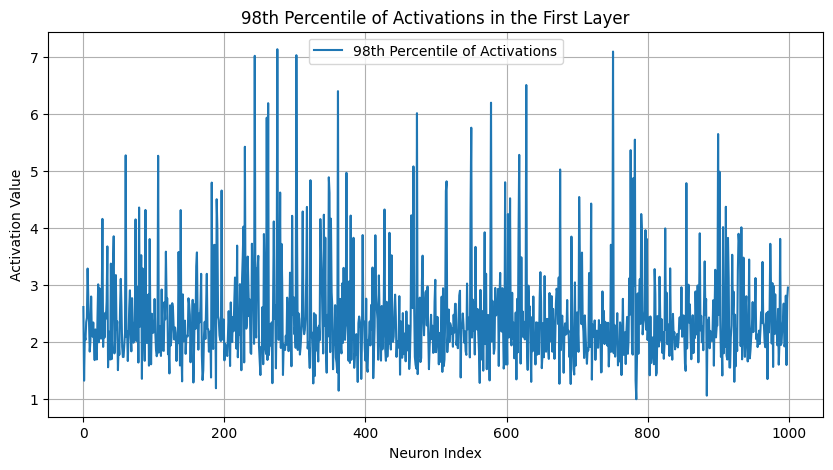

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 10)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Load dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Train the network
model = SimpleNN()
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

activations = []

for epoch in range(10):  # Number of epochs
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        # Collect activations from the first layer
        with torch.no_grad():
            activations.append(model.fc1(data).numpy())

# Compute 98th percentiles
activations = np.concatenate(activations)
percentiles_98 = np.percentile(activations, 98, axis=0)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(percentiles_98, label='98th Percentile of Activations')
plt.title('98th Percentile of Activations in the First Layer')
plt.xlabel('Neuron Index')
plt.ylabel('Activation Value')
plt.legend()
plt.grid()
plt.show()
